## 实验：绘制区分性轮廓

### 实验目标

本实验这是对先前实验的扩展。我们将执行以下操作：

- 用红色标记轮廓编号 `1`，粗细值为 `10`。
- 用绿色标记轮廓编号 `2`，粗细值为 `20`。
- 用蓝色标记轮廓编号 `3`，粗细值为 `30`。

从而，实现使用区分性轮廓，对图像内的不同对象进行区别标识。

### 1. 导入依赖库

In [2]:
import cv2                        # 导入OpenCV
import matplotlib.pyplot as plt   # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 加载并显示图像

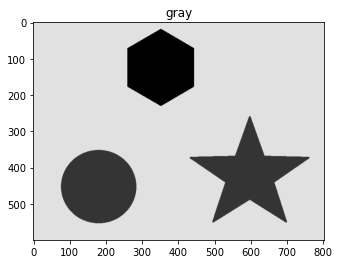

In [3]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab4/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取图像文件
image = cv2.imread('./data/sample shapes.png')         
# 将图像转换为灰度
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'gray' , gray_image )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(gray_image,cmap="gray")  # 使用matplotlib将图像喷绘成灰色
plt.title('gray')                   # 指定输出图像的标题
plt.show()                          # 显示图像

### 3. 图像二值化

将图像转换为二值图像。使用 Otsu 算法进行分割。如果 Otsu 的方法在您的图像上效果不佳，那么您可以选择固定的阈值实现（参考实验：图像二值化）。

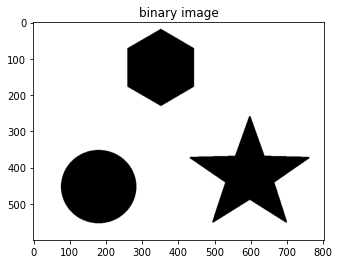

In [5]:
ret,binary_im = cv2.threshold(gray_image,0,255,cv2.THRESH_OTSU) 

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'binary image' , binary_im )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# 使用matplotlib将图像喷绘成灰色
plt.imshow(binary_im,cmap="gray")     
# 指定输出图像的标题
plt.title('binary image')             
# 显示图像
plt.show()                            

### 4. 图像反转

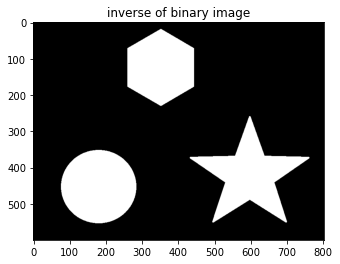

In [6]:
# 通过反转图像运算符 ~ 快速实现前后景黑白颜色的反转
inverted_binary_im= ~binary_im                 

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'inverse of binary image' , inverted_binary_im )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# 使用matplotlib将图像喷绘成灰色
plt.imshow(inverted_binary_im,cmap="gray")      
# 指定输出图像的标题
plt.title('inverse of binary image')            
# 显示图像
plt.show()                                      

### 5. 轮廓检测

In [9]:
# 执行轮廓检测，涵盖轮廓整个家族
# 同时，仅保存那些必须绘制轮廓点的坐标，节省内存
contours,hierarchy = cv2.findContours(inverted_binary_im,
                                cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 

# 输出轮廓层次返回列表
print(hierarchy)
# print(contours)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


### 6. 绘制区分性轮廓

In [10]:
# 执行轮廓检测，涵盖轮廓整个家族
# 同时，仅保存那些必须绘制轮廓点的坐标，节省内存
bgr = cv2.merge([inverted_binary_im, 
                 inverted_binary_im, inverted_binary_im]);

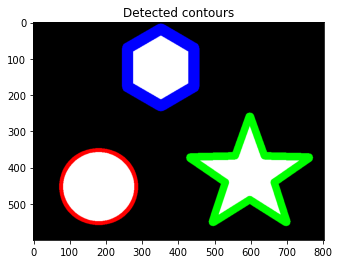

In [11]:
# 在bgr变量中的BGR图像上，以红色（BGR代码：0, 0, 255）
# 绘制轮廓#0（即：轮廓检测列表中的索引0，第一个检测出来的轮廓），粗细值为10。
with_contours = cv2.drawContours(bgr, contours, 0,(0,0,255),10) 

# 在bgr变量中的BGR图像上，以红色（BGR代码：0, 255, 0）
# 绘制轮廓#1（即：轮廓检测列表中的索引1，第二个检测出来的轮廓），粗细值为20。
with_contours = cv2.drawContours(with_contours, contours, 1,(0, 255, 0),20) 

# 在bgr变量中的BGR图像上，以蓝色（BGR代码：255, 0, 0）
# 绘制轮廓#2（即：轮廓检测列表中的索引2）第三个检测出来的轮廓），粗细值为30。
with_contours = cv2.drawContours(with_contours, contours, 2,(255,0, 0),30) 

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'Detected contours' , with_contours )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# 使用matplotlib将图像转换为RGB
plt.imshow(with_contours[:,:,::-1])          
# 指定输出图像的标题
plt.title('Detected contours')               
# 显示图像
plt.show()                                   

### 实验小结

在本实验中，我们练习了如何从检测到的轮廓列表中访问各个轮廓。我们还练习为各个轮廓赋予不同的粗细度和颜色，从而对不同的对象绘制出区分性的轮廓。